# Challenge 1 

In [82]:
with open("Saturday, April 02, 2016", 'r') as f:
    MTA_dict = {}
    f.readline()
    for row in f.readlines()[:1000]:
        row = row.split(",")
        key = tuple(row[:4])
        if key in MTA_dict:
            MTA_dict[key].append( row[4:] )
        else: 
            MTA_dict[key] = [row[4:]]
    
MTA_dict

{('A002',
  'R051',
  '02-00-00',
  '59 ST'): [['NQR456',
   'BMT',
   '03/26/2016',
   '00:00:00',
   'REGULAR',
   '0005595746',
   '0001893277                                             \n'], ['NQR456',
   'BMT',
   '03/26/2016',
   '04:00:00',
   'REGULAR',
   '0005595746',
   '0001893282                                             \n'], ['NQR456',
   'BMT',
   '03/26/2016',
   '08:00:00',
   'REGULAR',
   '0005595746',
   '0001893282                                             \n'], ['NQR456',
   'BMT',
   '03/26/2016',
   '12:00:00',
   'REGULAR',
   '0005595746',
   '0001893282                                             \n'], ['NQR456',
   'BMT',
   '03/26/2016',
   '16:00:00',
   'REGULAR',
   '0005595746',
   '0001893282                                             \n'], ['NQR456',
   'BMT',
   '03/26/2016',
   '20:00:00',
   'REGULAR',
   '0005595746',
   '0001893282                                             \n'], ['NQR456',
   'BMT',
   '03/27/2016',
   '00:00:00',
   'RE

#  Challenge 2

In [83]:
from dateutil import parser

for key, values in MTA_dict.iteritems():
    time_series = []
    for val in values:
        time = parser.parse(val[2]+'-'+val[3])
        entries = int(val[-2])  
        time_series.append((time, entries))
    MTA_dict[key] = time_series
    
MTA_dict

{('A002',
  'R051',
  '02-00-00',
  '59 ST'): [(datetime.datetime(2016, 3, 26, 0, 0),
   5595746), (datetime.datetime(2016, 3, 26, 4, 0), 5595746), (datetime.datetime(2016, 3, 26, 8, 0),
   5595746), (datetime.datetime(2016, 3, 26, 12, 0),
   5595746), (datetime.datetime(2016, 3, 26, 16, 0), 5595746), (datetime.datetime(2016, 3, 26, 20, 0),
   5595746), (datetime.datetime(2016, 3, 27, 0, 0),
   5595746), (datetime.datetime(2016, 3, 27, 4, 0), 5595746), (datetime.datetime(2016, 3, 27, 8, 0),
   5595746), (datetime.datetime(2016, 3, 27, 12, 0),
   5595746), (datetime.datetime(2016, 3, 27, 16, 0), 5595746), (datetime.datetime(2016, 3, 27, 20, 0),
   5595746), (datetime.datetime(2016, 3, 28, 0, 0),
   5595746), (datetime.datetime(2016, 3, 28, 4, 0), 5595746), (datetime.datetime(2016, 3, 28, 8, 0),
   5595780), (datetime.datetime(2016, 3, 28, 12, 0),
   5595936), (datetime.datetime(2016, 3, 28, 16, 0), 5596182), (datetime.datetime(2016, 3, 28, 20, 0),
   5596691), (datetime.datetime(2016, 3

# Challenge 3

In [84]:
for key, values in MTA_dict.iteritems():
    days = []
    
    prev_day, prev_cum_enteries = values[0]
    for val in values[::6]: #Grab each new day
        day, cum_enteries = val
        days.append((prev_day.date(), cum_enteries - prev_cum_enteries))
        prev_day, prev_cum_enteries = day, cum_enteries
       
    MTA_dict[key] = days
    
MTA_dict


{('A002', 'R051', '02-00-00', '59 ST'): [(datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 27), 0),
  (datetime.date(2016, 3, 28), 1150),
  (datetime.date(2016, 3, 29), 1107),
  (datetime.date(2016, 3, 30), 1162),
  (datetime.date(2016, 3, 31), 268),
  (datetime.date(2016, 3, 31), 1207)],
 ('A002', 'R051', '02-00-01', '59 ST'): [(datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 27), 0),
  (datetime.date(2016, 3, 28), 1036),
  (datetime.date(2016, 3, 29), 973),
  (datetime.date(2016, 3, 30), 1058),
  (datetime.date(2016, 3, 31), 256),
  (datetime.date(2016, 3, 31), 1047)],
 ('A002', 'R051', '02-03-00', '59 ST'): [(datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 27), 0),
  (datetime.date(2016, 3, 28), 613),
  (datetime.date(2016, 3, 29), 795),
  (datetime.date(2016, 3, 30), 722),
  (datetime.date(2016, 3, 31), 717),
  (datetime.date(2016, 3, 31), 641)],
 ('

# Challenge 4

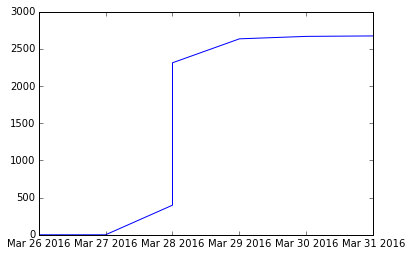

In [78]:
keys = MTA_dict.keys()
values = MTA_dict[keys[0]]
days, enteries = [val[0] for val in values], [val[1] for val in values]

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(days, enteries)

# Challenge 5

In [85]:
station_dict = {}
for MTA, date_count_pairs in MTA_dict.iteritems():
    station = (MTA[0], MTA[1], MTA[3])
    if station in station_dict:
        date_count_dict = dict(station_dict[station])
        for day, count in date_count_pairs:
            if day in date_count_dict:
                date_count_dict[day] += count
            else:
                date_count_dict[day] = count
        station_dict[station] = date_count_dict.items()
    else:
        station_dict[station] = date_count_pairs
    

In [86]:
station_dict

{('A002', 'R051', '59 ST'): [(datetime.date(2016, 3, 31), 31080),
  (datetime.date(2016, 3, 26), 2993),
  (datetime.date(2016, 3, 27), 411),
  (datetime.date(2016, 3, 28), 15502),
  (datetime.date(2016, 3, 29), 16510),
  (datetime.date(2016, 3, 30), 16962)],
 ('A006', 'R079', '5 AV/59 ST'): [(datetime.date(2016, 3, 31), 13959),
  (datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 27), 0),
  (datetime.date(2016, 3, 28), 13472),
  (datetime.date(2016, 3, 29), 13169),
  (datetime.date(2016, 3, 30), 13596)],
 ('A007', 'R079', '5 AV/59 ST'): [(datetime.date(2016, 3, 31), 0),
  (datetime.date(2016, 3, 26), 0),
  (datetime.date(2016, 3, 27), 0),
  (datetime.date(2016, 3, 28), 961),
  (datetime.date(2016, 3, 29), 635),
  (datetime.date(2016, 3, 30), 721)]}